# Practical 15

# Develop an application to predict diabetes using decision tree classifier

In [1]:
# Import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.datasets import load_iris

In [2]:
data = pd.read_csv("D:/Machine Learning/diabetes.csv") #Import the data set. 

In [3]:
data #Check the data.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


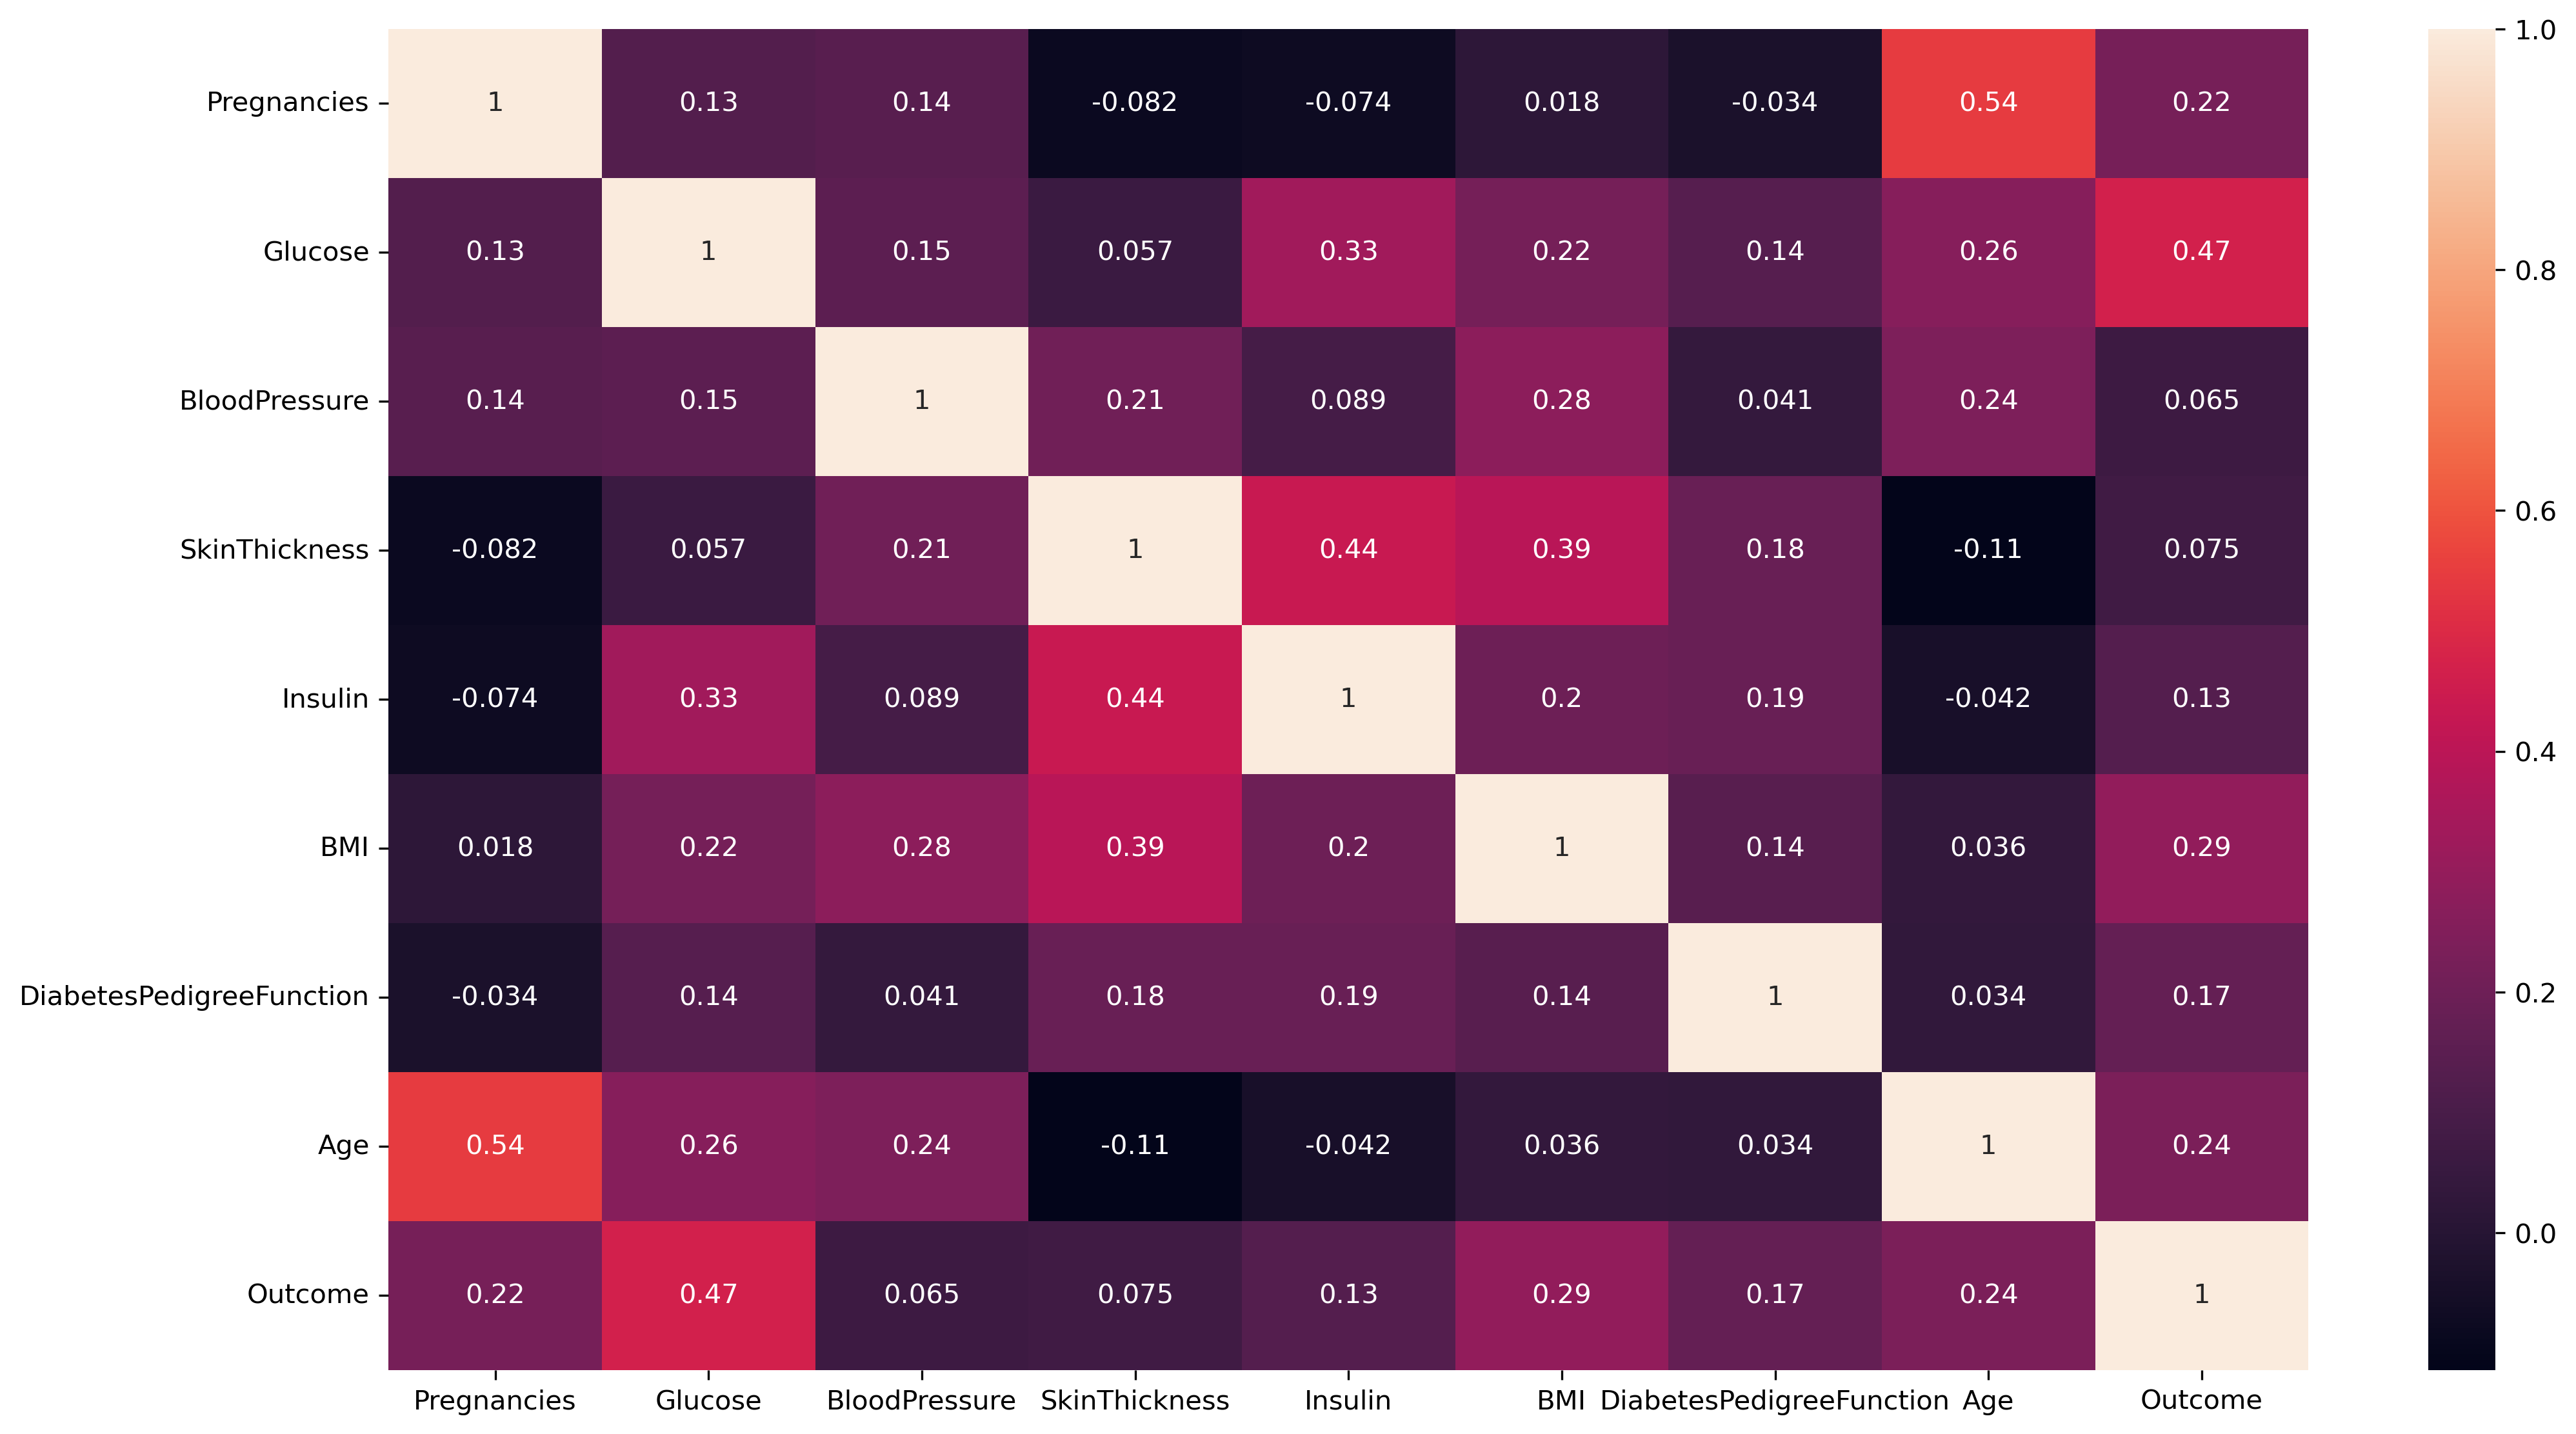

In [4]:
fig = plt.figure(figsize = (16,9) , dpi = 300) # Finding correlation between the columns
sns.heatmap(data.corr(),annot = True) #pearson correlation
plt.show()

In [5]:
x = data.iloc[ : , :-1].values #splitting dependent and independent data.
y = data.iloc[ : , -1].values

In [6]:
print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)  # splitting training and test dataset.

In [8]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
clf_entropy.fit(x_train, y_train) # Setting up the criteria, the random state and depth of the Decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [9]:
y_pred2 = clf_entropy.predict(x_test)
print("Predicted Values : ")
print(y_pred2)

Predicted Values : 
[0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0
 1 1 0 1 0 1]


In [10]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))  # Creating the confusion matrix.
print("Accuracy: \n", accuracy_score(y_test, y_pred2)*100) # Finding the accuracy and report
print("Report: \n", classification_report(y_test, y_pred2))

Confusion Matrix: 
 [[78 21]
 [14 41]]
Accuracy: 
 77.27272727272727
Report: 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        99
           1       0.66      0.75      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



In [11]:
xrandom = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # Testing the algorithm by providing random values of X.
y_pred = clf_entropy.predict(xrandom)
print(y_pred)

[1]


In [12]:
fig = plt.figure(figsize = (25,20), dpi = 500)
a = tree.plot_tree(clf_entropy, feature_names = y, class_names = ["Diabetic", "Non-Diabetic"], filled = True)

In [13]:
 # Using bagging to improve the accuracy of the decision tree.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 1)
tree = tree.fit(x_train, y_train)
bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, random_state = 1)
bag = bag.fit(x_train, y_train)
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

In [14]:
bag_test = round(accuracy_score(y_test, y_test_pred), 2)*100
print(bag_test, "%") # Checking the accuracy after bagging.

82.0 %
